In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from ipywidgets import widgets, interact
import re
import io
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# เหตุผลที่ย้ายถิ่นฐาน

In [2]:
reasons_63 = pd.read_csv('../files/เหตุผลของการย้ายถิ่น_63.csv')
reasons_63["Year"] = "2563"
reasons_63[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]] = reasons_63[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]].round()
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,NaN,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,NaN,1874.0,83.0,1179.0,780.0,2563


In [3]:
reasons_63.isnull()

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False
9,False,True,False,False,False,False,False


In [4]:
reasons_63.describe()

,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
count,9.000000,11.000000,11.000000,11.000000,11.000000
mean,3574.555556,16975.545455,7282.636364,10769.909091,7403.545455
std,4802.290160,16204.865562,6954.088010,15443.097665,8380.134490
min,497.000000,364.000000,83.000000,535.000000,123.000000
25%,1567.000000,3796.500000,2495.500000,1636.500000,1419.000000
50%,2018.000000,13067.000000,5193.000000,4700.000000,2488.000000
75%,2649.000000,27444.000000,10103.000000,13793.000000,11657.500000
max,16098.000000,50846.000000,23140.000000,53217.000000,25566.000000


In [5]:
reasons_63.fillna(reasons_63["กรุงเทพมหานคร"].quantile(0.25), inplace=True)
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,1567.0,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,1567.0,1874.0,83.0,1179.0,780.0,2563


In [6]:
reasons_64 = pd.read_csv('../files/เหตุผลของการย้ายถิ่น_64.csv')
reasons_64.rename(columns={"เหตุผลของการย้ายถิ่น 2564":"เหตุผลของการย้ายถิ่น"}, inplace=True)
reasons_64["Year"] = "2564"
reasons_64[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]] = reasons_64[["กรุงเทพมหานคร","กลาง","เหนือ","ตะวันออกเฉียงเหนือ","ใต้"]].apply(lambda x : x.str.strip().str.replace(",","")).astype(float).round()
reasons_64

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,กลับภูมิลำเนา,2032.0,15369.0,31706.0,78988.0,24152.0,2564
1,ติดตามครอบครัว,4628.0,33976.0,24396.0,27694.0,27996.0,2564
2,หางานทำ,30752.0,47436.0,5248.0,4504.0,10516.0,2564
3,ย้ายที่อยู่อาศัย,1312.0,44906.0,9912.0,19393.0,16995.0,2564
4,หน้าที่การงาน,2707.0,32481.0,6054.0,6766.0,7356.0,2564
5,ต้องการเปลี่ยนงาน,1730.0,15664.0,5649.0,4949.0,2168.0,2564
6,ศึกษาต่อ,1100.0,2375.0,5867.0,4304.0,6017.0,2564
7,ขาดคนดูแล,883.0,4102.0,2747.0,2847.0,3853.0,2564
8,ช่วยธุรกิจในครอบครัว,3859.0,1940.0,1920.0,419.0,133.0,2564
9,รักษาตัว,NaN,601.0,489.0,4792.0,377.0,2564


In [7]:
reasons_64.isnull()

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False


In [8]:
reasons_64.describe()

,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
count,9.000000,11.000000,11.000000,11.000000,11.000000
mean,5444.777778,18302.545455,8582.636364,14070.272727,9083.363636
std,9574.354610,18181.285347,10151.743498,23118.805376,9844.160444
min,883.000000,601.000000,421.000000,117.000000,133.000000
25%,1312.000000,2426.500000,2333.500000,3575.500000,1272.500000
50%,2032.000000,15369.000000,5649.000000,4792.000000,6017.000000
75%,3859.000000,33228.500000,7983.000000,13079.500000,13755.500000
max,30752.000000,47436.000000,31706.000000,78988.000000,27996.000000


In [9]:
reasons_64.fillna(reasons_64["กรุงเทพมหานคร"].quantile(0.25), inplace=True)
reasons_64

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,กลับภูมิลำเนา,2032.0,15369.0,31706.0,78988.0,24152.0,2564
1,ติดตามครอบครัว,4628.0,33976.0,24396.0,27694.0,27996.0,2564
2,หางานทำ,30752.0,47436.0,5248.0,4504.0,10516.0,2564
3,ย้ายที่อยู่อาศัย,1312.0,44906.0,9912.0,19393.0,16995.0,2564
4,หน้าที่การงาน,2707.0,32481.0,6054.0,6766.0,7356.0,2564
5,ต้องการเปลี่ยนงาน,1730.0,15664.0,5649.0,4949.0,2168.0,2564
6,ศึกษาต่อ,1100.0,2375.0,5867.0,4304.0,6017.0,2564
7,ขาดคนดูแล,883.0,4102.0,2747.0,2847.0,3853.0,2564
8,ช่วยธุรกิจในครอบครัว,3859.0,1940.0,1920.0,419.0,133.0,2564
9,รักษาตัว,1312.0,601.0,489.0,4792.0,377.0,2564


In [10]:
reasons_6364 = pd.concat([reasons_63, reasons_64], ignore_index=True)
reasons_6364

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้,Year
0,หางานทำ,16098.0,34475.0,9882.0,15859.0,8642.0,2563
1,ต้องการเปลี่ยนงาน,2649.0,15823.0,5193.0,6530.0,2058.0,2563
2,ต้องการรายได้เพิ่มขึ้น,2018.0,7801.0,2879.0,535.0,197.0,2563
3,หน้าที่การงาน,4064.0,26682.0,10324.0,2552.0,7836.0,2563
4,ศึกษาต่อ,497.0,3951.0,3561.0,2094.0,2488.0,2563
5,ย้ายที่อยู่อาศัย,1567.0,50846.0,5822.0,11727.0,14673.0,2563
6,กลับภูมิลำเนา,1781.0,13067.0,23140.0,53217.0,25566.0,2563
7,ติดตามครอบครัว,2362.0,28206.0,15433.0,19007.0,16858.0,2563
8,ช่วยธุรกิจในครอบครัว,1567.0,364.0,1680.0,1069.0,123.0,2563
9,รักษาตัว,1567.0,1874.0,83.0,1179.0,780.0,2563


In [11]:
def acronymn(val):
    if val == "กรุงเทพมหานคร":
        return "Central"
    elif val == "กลาง":
        return "Middle"
    elif val == "เหนือ":
        return "North"
    elif val == "ตะวันออกเฉียงเหนือ":
        return "Notheast"
    else:
        return "South"
   

In [12]:
reasons_6364 = pd.melt(reasons_6364,id_vars=["เหตุผลของการย้ายถิ่น","Year"],var_name="Region", value_name="People").copy()
reasons_6364

,เหตุผลของการย้ายถิ่น,Year,Region,People
0,หางานทำ,2563,กรุงเทพมหานคร,16098.0
1,ต้องการเปลี่ยนงาน,2563,กรุงเทพมหานคร,2649.0
2,ต้องการรายได้เพิ่มขึ้น,2563,กรุงเทพมหานคร,2018.0
3,หน้าที่การงาน,2563,กรุงเทพมหานคร,4064.0
4,ศึกษาต่อ,2563,กรุงเทพมหานคร,497.0
...,...,...,...,...
105,ศึกษาต่อ,2564,ใต้,6017.0
106,ขาดคนดูแล,2564,ใต้,3853.0
107,ช่วยธุรกิจในครอบครัว,2564,ใต้,133.0
108,รักษาตัว,2564,ใต้,377.0


In [13]:
reasons_6364["Region"] = reasons_6364["Region"].apply(lambda x: acronymn(x))
reasons_6364

,เหตุผลของการย้ายถิ่น,Year,Region,People
0,หางานทำ,2563,Central,16098.0
1,ต้องการเปลี่ยนงาน,2563,Central,2649.0
2,ต้องการรายได้เพิ่มขึ้น,2563,Central,2018.0
3,หน้าที่การงาน,2563,Central,4064.0
4,ศึกษาต่อ,2563,Central,497.0
...,...,...,...,...
105,ศึกษาต่อ,2564,South,6017.0
106,ขาดคนดูแล,2564,South,3853.0
107,ช่วยธุรกิจในครอบครัว,2564,South,133.0
108,รักษาตัว,2564,South,377.0


In [14]:
reasons_6364.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   เหตุผลของการย้ายถิ่น  110 non-null    object 
 1   Year                  110 non-null    object 
 2   Region                110 non-null    object 
 3   People                110 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [15]:
reasons_6364.sort_values("People", ascending=False)

,เหตุผลของการย้ายถิ่น,Year,Region,People
77,กลับภูมิลำเนา,2564,Notheast,78988.0
72,กลับภูมิลำเนา,2563,Notheast,53217.0
27,ย้ายที่อยู่อาศัย,2563,Middle,50846.0
35,หางานทำ,2564,Middle,47436.0
36,ย้ายที่อยู่อาศัย,2564,Middle,44906.0
...,...,...,...,...
90,ต้องการรายได้เพิ่มขึ้น,2563,South,197.0
107,ช่วยธุรกิจในครอบครัว,2564,South,133.0
96,ช่วยธุรกิจในครอบครัว,2563,South,123.0
87,ต้องการรายได้เพิ่มขึ้น,2564,Notheast,117.0


Text(0.5, 1.0, 'Increase of Migration within Thailand across all regions between 2563 and 2564')

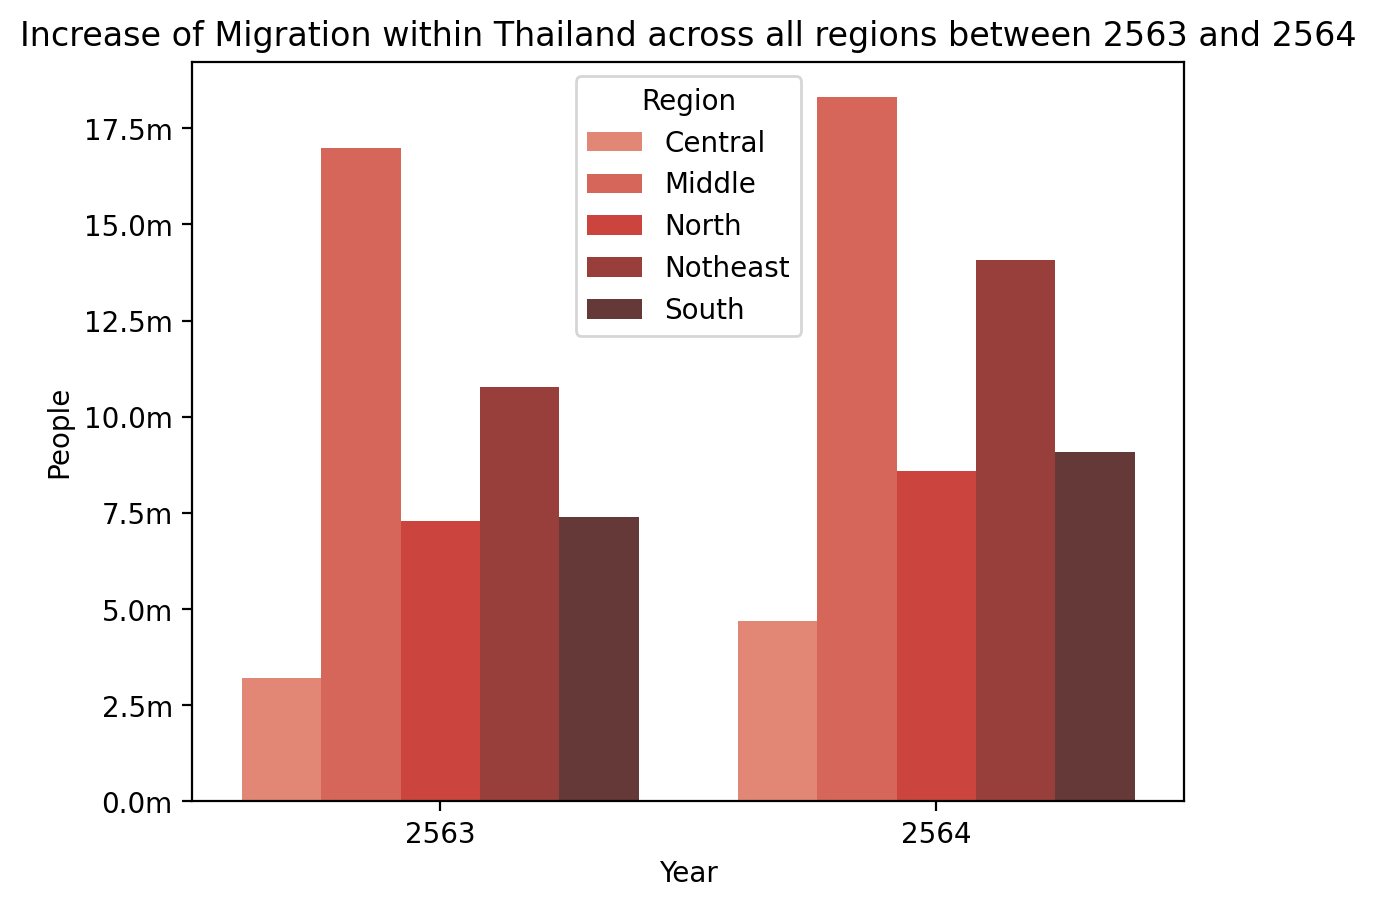

In [16]:
bargraph = sns.barplot(data=reasons_6364, x="Year", y="People", errorbar=None, hue="Region", palette="Reds_d")
bargraph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}m"))
plt.title("Increase of Migration within Thailand across all regions between 2563 and 2564")

In [38]:
regions = reasons_6364['Region'].unique()
region_dropdown = widgets.Dropdown(options=regions, description='Region:')

def update_plot(region):
    plt.figure(figsize=(8, 5)) 
    bargraph = sns.barplot(data=reasons_6364[reasons_6364['Region'] == region], x="Year", y="People", errorbar=None, color=".7")
    bargraph.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x/1000:,.1f}m"))

widgets.interact(update_plot, region=region_dropdown)

interactive(children=(Dropdown(description='Region:', options=('Central', 'Middle', 'North', 'Notheast', 'Sout…

<function __main__.update_plot(region)>

# [จำนวนผู้สูงอายุจากการสำรวจ จำแนกตามลักษณะการอยู่อาศัย กลุ่มอายุ เพศ](https://catalog.nso.go.th/dataset/os_01_00045/resource/c7b3b266-a884-47e1-b042-5d8eccce7d69)

In [18]:
elders = pd.read_csv("https://catalogapi.nso.go.th/api/index?table=OS_01_0045_15&format=csv", encoding='utf-8')
elders.head(20)

,year,sex,age_group,type_of_con_mat,value,unit,source
0,2550,รวม,รวม,รวม,7020959,คน,สำนักงานสถิติแห่งชาติ
1,2550,รวม,60-69 ปี,รวม,4125253,คน,สำนักงานสถิติแห่งชาติ
2,2550,รวม,70-79 ปี,รวม,2226712,คน,สำนักงานสถิติแห่งชาติ
3,2550,รวม,80 ปีขึ้นไป,รวม,668994,คน,สำนักงานสถิติแห่งชาติ
4,2550,ชาย,รวม,รวม,3130736,คน,สำนักงานสถิติแห่งชาติ
5,2550,ชาย,60-69 ปี,รวม,1910507,คน,สำนักงานสถิติแห่งชาติ
6,2550,ชาย,70-79 ปี,รวม,962209,คน,สำนักงานสถิติแห่งชาติ
7,2550,ชาย,80 ปีขึ้นไป,รวม,258021,คน,สำนักงานสถิติแห่งชาติ
8,2550,หญิง,รวม,รวม,3890223,คน,สำนักงานสถิติแห่งชาติ
9,2550,หญิง,60-69 ปี,รวม,2214746,คน,สำนักงานสถิติแห่งชาติ


In [20]:
elders = elders[(elders['type_of_con_mat'] == 'อยู่คนเดียว') & (elders['age_group'] != 'รวม')].copy()
elders

,year,sex,age_group,type_of_con_mat,value,unit,source
13,2550,รวม,60-69 ปี,อยู่คนเดียว,256415,คน,สำนักงานสถิติแห่งชาติ
14,2550,รวม,70-79 ปี,อยู่คนเดียว,213828,คน,สำนักงานสถิติแห่งชาติ
15,2550,รวม,80 ปีขึ้นไป,อยู่คนเดียว,67762,คน,สำนักงานสถิติแห่งชาติ
17,2550,ชาย,60-69 ปี,อยู่คนเดียว,87756,คน,สำนักงานสถิติแห่งชาติ
18,2550,ชาย,70-79 ปี,อยู่คนเดียว,81477,คน,สำนักงานสถิติแห่งชาติ
19,2550,ชาย,80 ปีขึ้นไป,อยู่คนเดียว,21001,คน,สำนักงานสถิติแห่งชาติ
21,2550,หญิง,60-69 ปี,อยู่คนเดียว,168659,คน,สำนักงานสถิติแห่งชาติ
22,2550,หญิง,70-79 ปี,อยู่คนเดียว,132351,คน,สำนักงานสถิติแห่งชาติ
23,2550,หญิง,80 ปีขึ้นไป,อยู่คนเดียว,46761,คน,สำนักงานสถิติแห่งชาติ
49,2557,รวม,60-69 ปี,อยู่คนเดียว,431450,คน,สำนักงานสถิติแห่งชาติ


findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font family 'Sukhumvit Set' not found.
findfont: Font famil

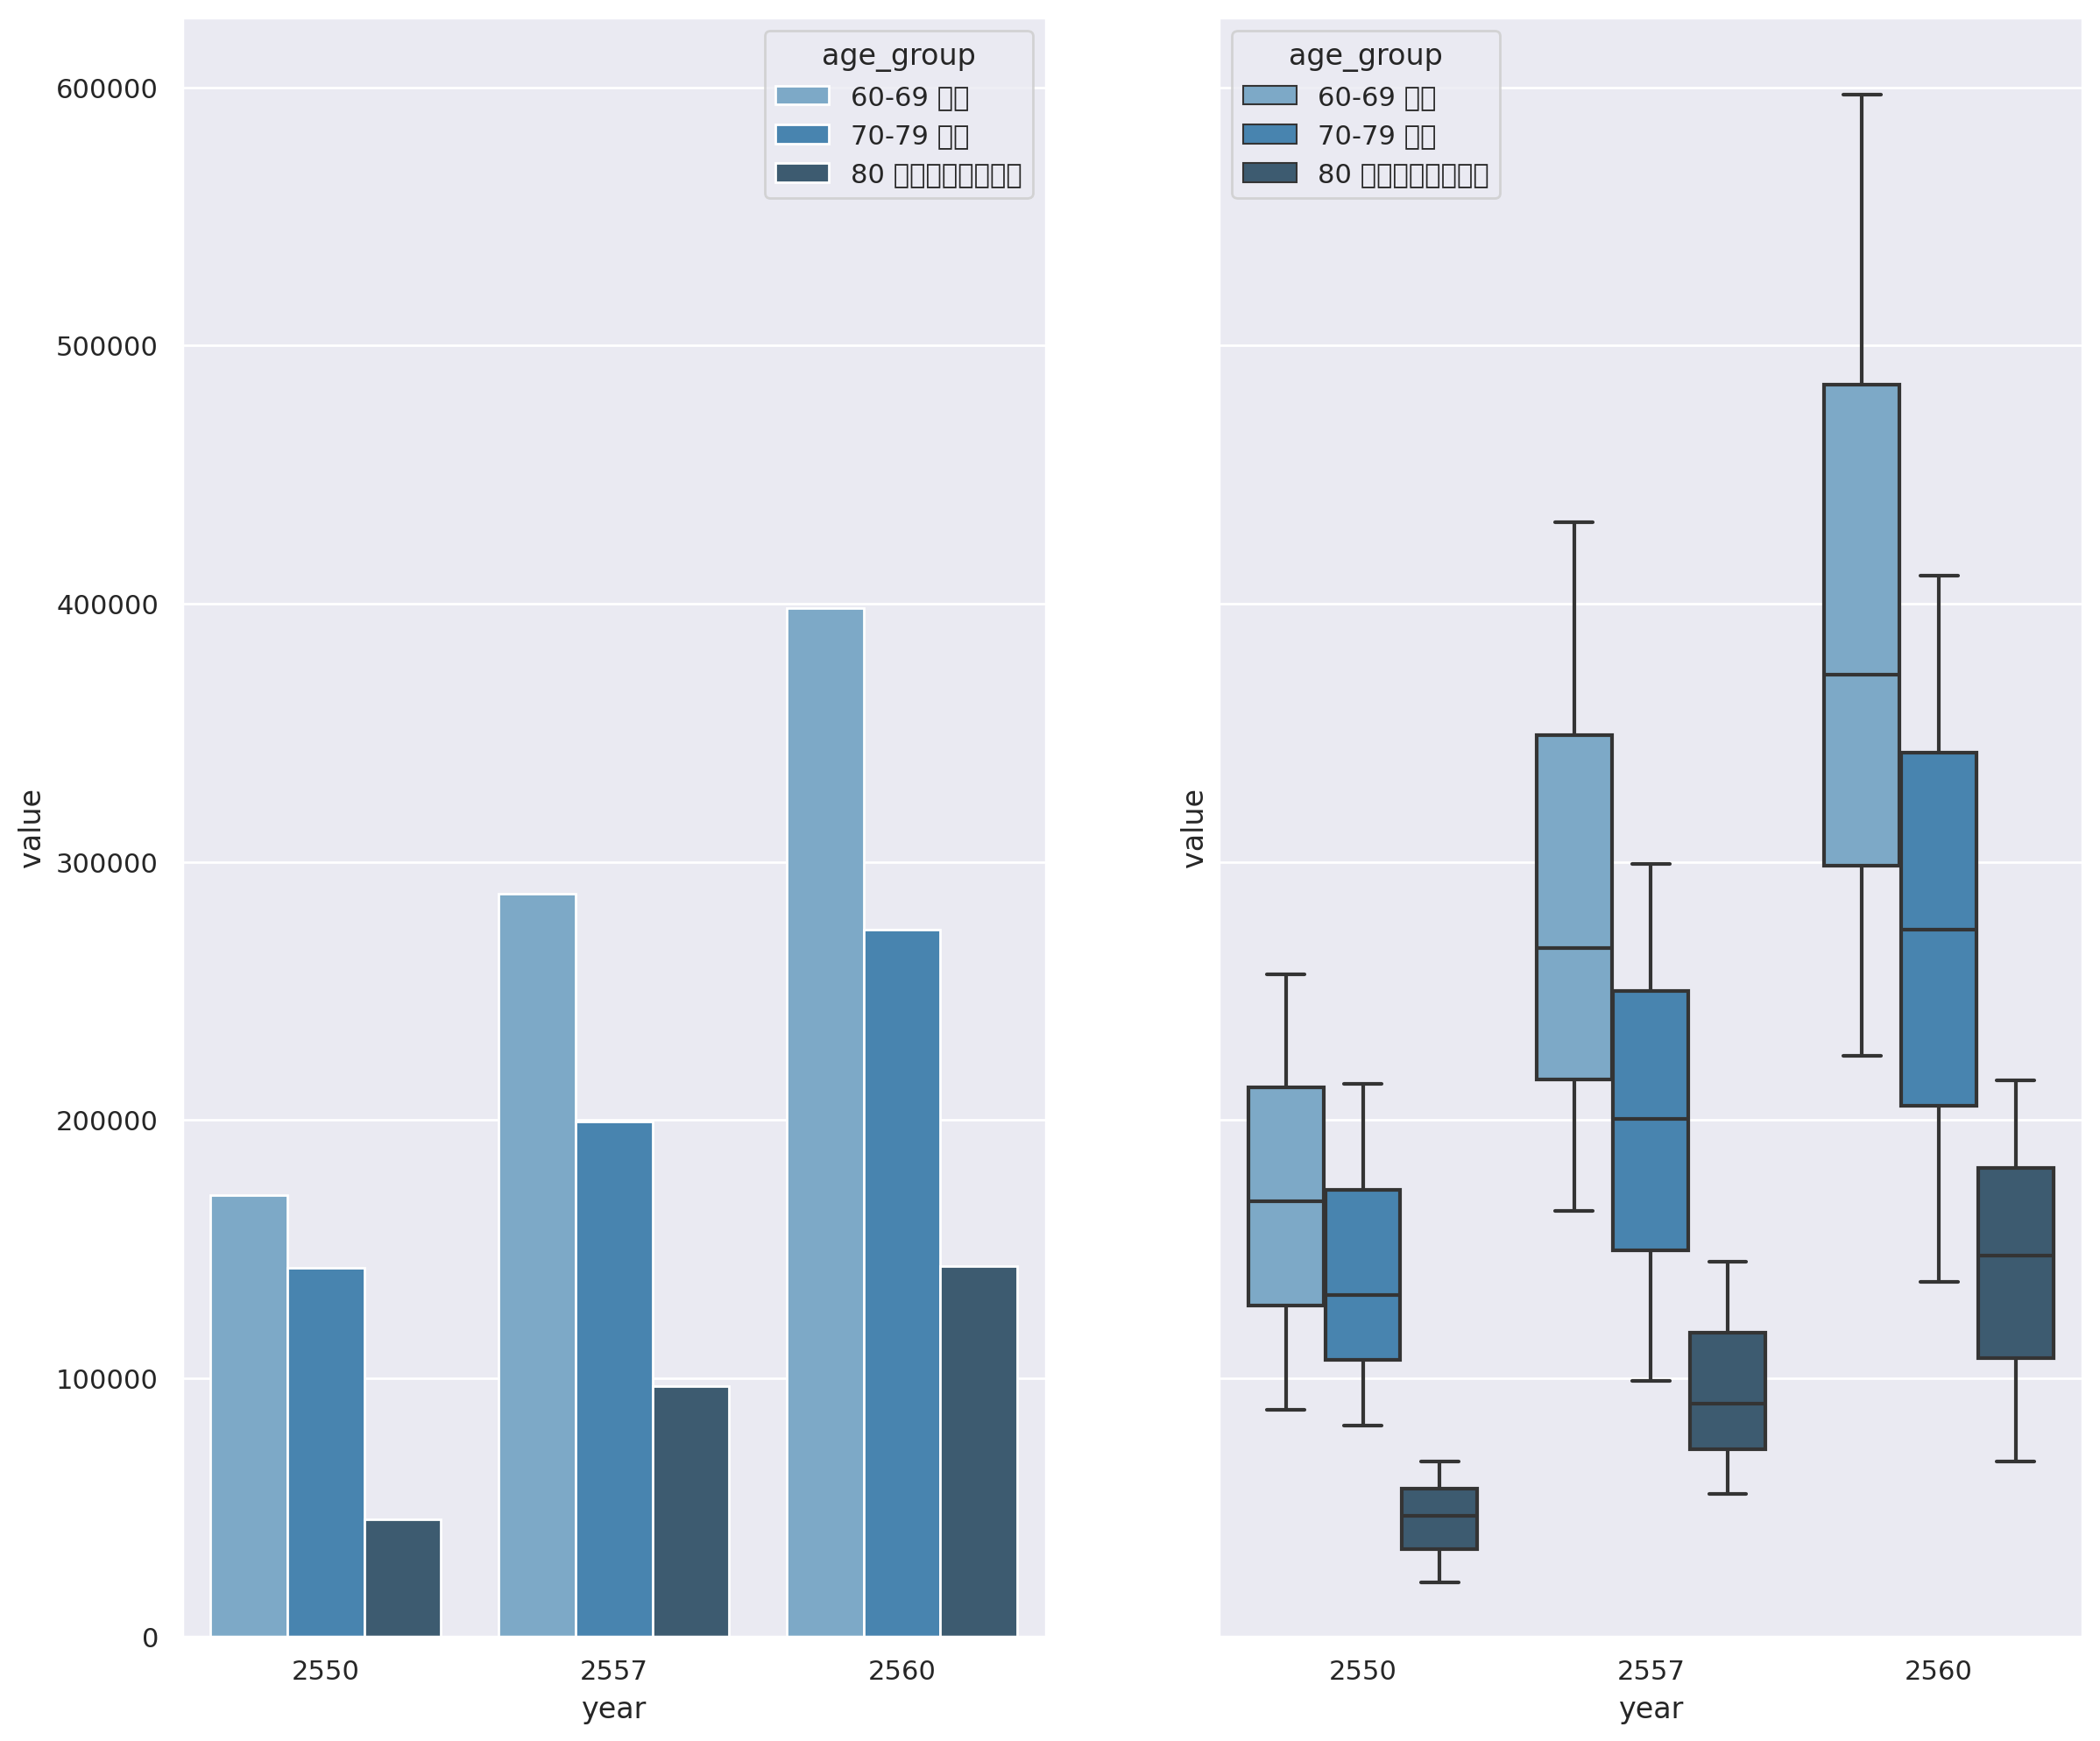

In [27]:
fig, ax = plt.subplots(1,2, figsize=(14,12), sharey=True)
sns.set_theme(font='Sukhumvit Set')
grid1 = sns.barplot(elders, x = 'year', hue = 'age_group', y = 'value', palette='Blues_d', errorbar=None, ax=ax[0])
grid2 = sns.boxplot(elders, x = 'year', hue = 'age_group', y = 'value', palette='Blues_d', ax=ax[1])

# ประชากรแฝงกลางคืน

In [36]:
text="""ตารางที่ 2 จำนวนประชากรแฝง จำแนกรายจังหวัด
หน่วย : พันคน 
จังหวัด,ปี,จำนวนประชากรแฝงกลางคืน
กรุงเทพมหานคร,2565,2.708
กรุงเทพมหานคร,2564,2.324
กรุงเทพมหานคร,2563,2.35
กรุงเทพมหานคร,2562,2.27
กรุงเทพมหานคร,2561,2.04
กรุงเทพมหานคร,2560,2.05
"""

In [37]:
night_pop = pd.read_csv(io.StringIO(text), skiprows=2)
night_pop

,จังหวัด,ปี,จำนวนประชากรแฝงกลางคืน
0,กรุงเทพมหานคร,2565,2.708
1,กรุงเทพมหานคร,2564,2.324
2,กรุงเทพมหานคร,2563,2.350
3,กรุงเทพมหานคร,2562,2.270
4,กรุงเทพมหานคร,2561,2.040
5,กรุงเทพมหานคร,2560,2.050
